Problem Statement:
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

Data location: https://www.kaggle.com/mlg-ulb/creditcardfraud

Training a model on a balanced dataset optimizes performance on validation data.
However, the goal is to optimize performance on the imbalanced production dataset. You ultimately need to find a balance that works best in production.
One solution to this problem is: Use all fraudulent transactions, but subsample non-fraudulent transactions as needed to hit our target rate.
Business questions to brainstorm:
Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount

How different is the amount of money used in different transaction classes?
Do fraudulent transactions occur more often during a certain frames?

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [15]:
credit = pd.read_csv("creditcard.csv")

In [16]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [19]:
credit.shape

(284807, 31)

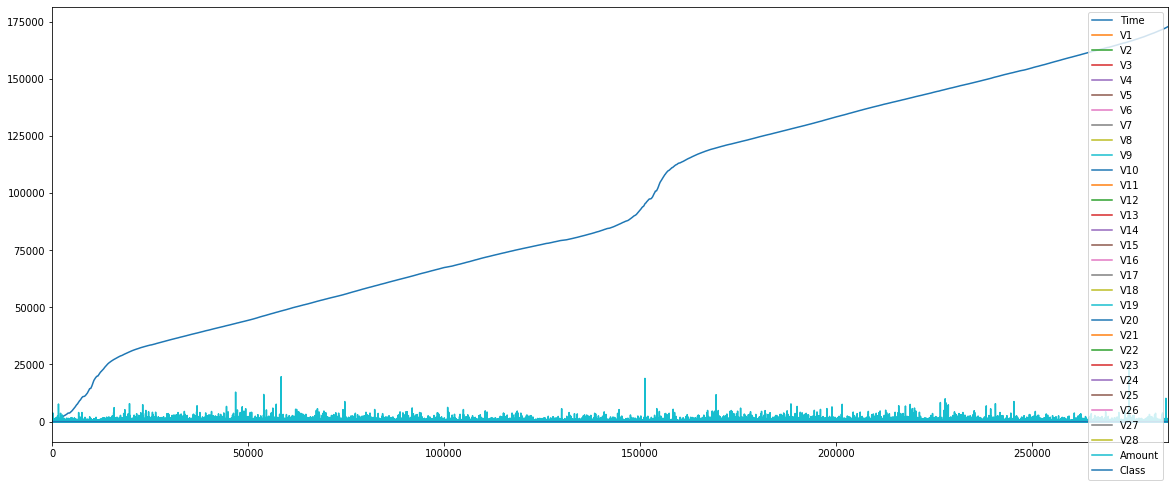

In [20]:
credit.plot(figsize=(20, 8))
plt.show()

0    284315
1       492
Name: Class, dtype: int64

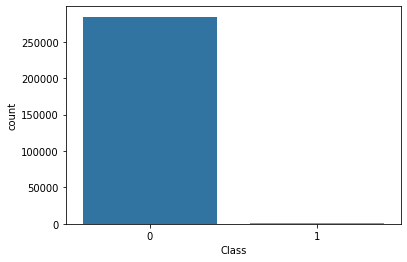

In [21]:
import seaborn as sns
sns.countplot(x = "Class", data = credit)
credit.loc[:, 'Class'].value_counts()

Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.
The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.
The Time and Amount features are not transformed data.
There is no missing value in the dataset.

In [22]:
V_col = credit[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
V_col.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


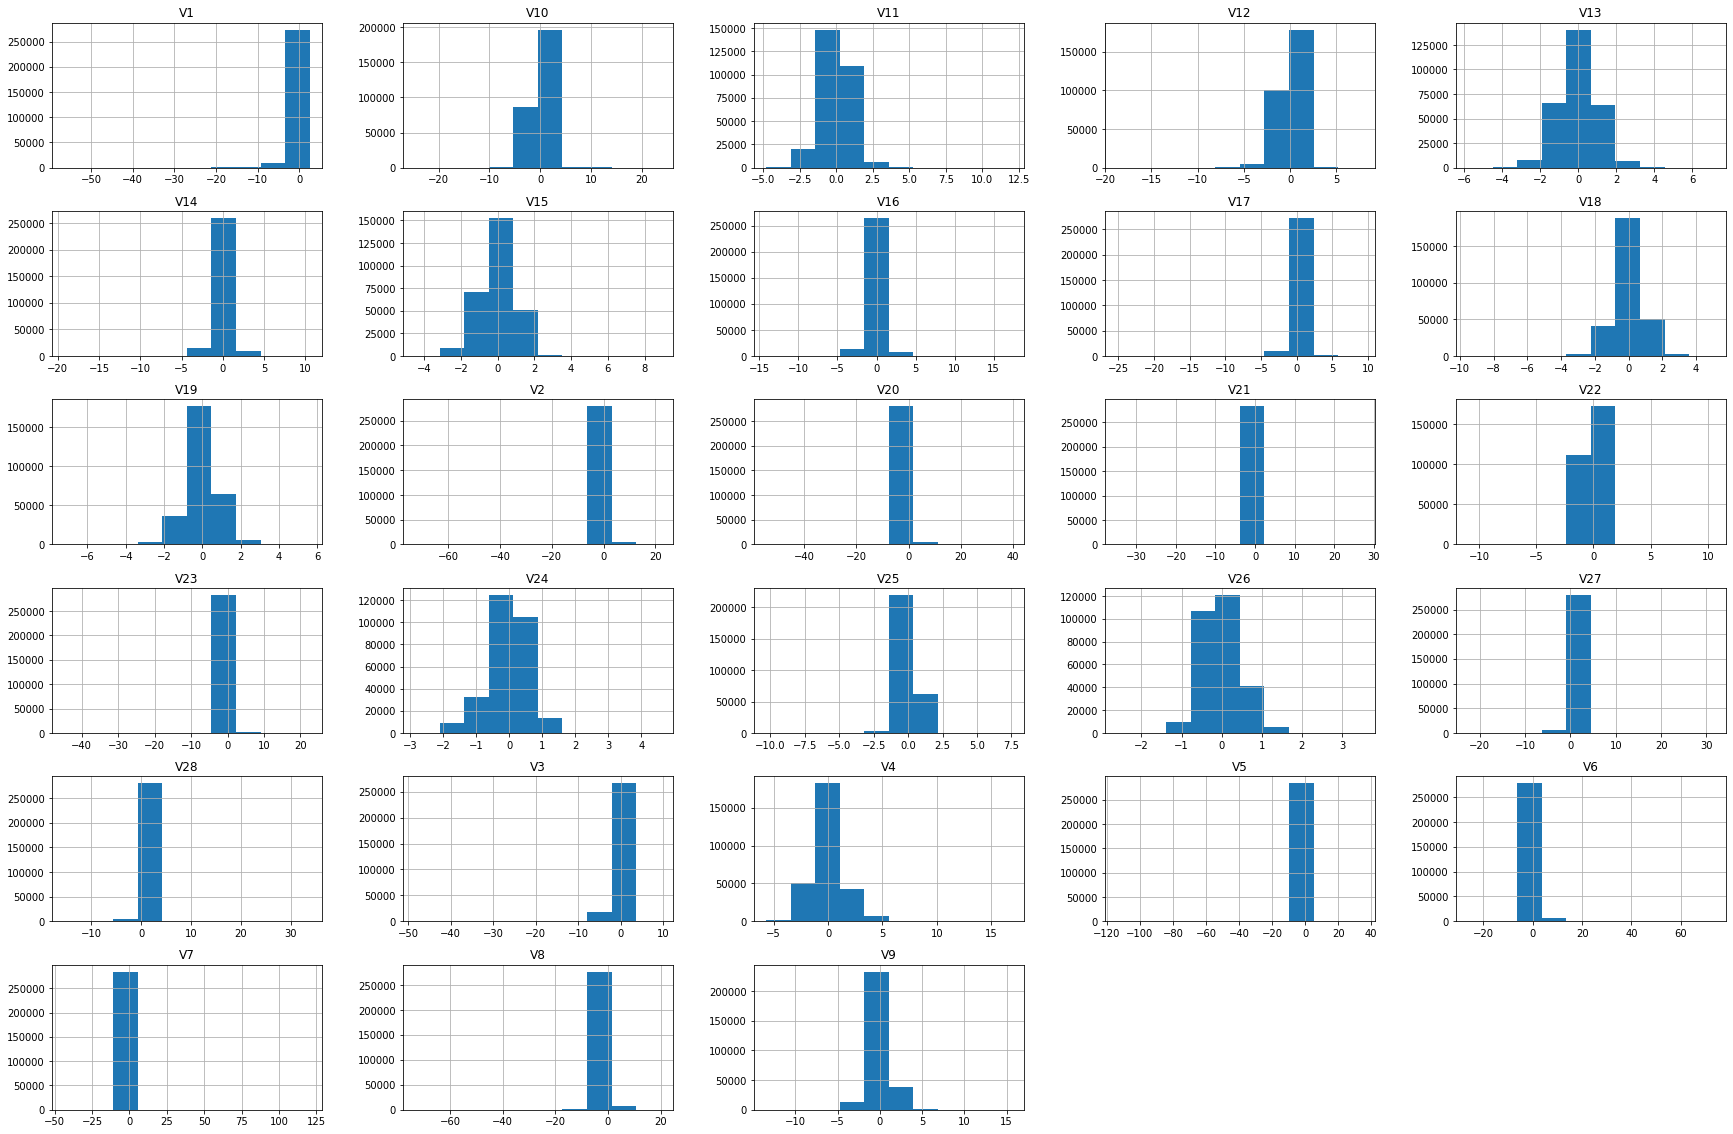

In [23]:
V_col.hist(figsize=(30, 20))
plt.show()

In [24]:
no_of_normal_transcations = len(credit[credit['Class']==1])
no_of_fraud_transcations = len(credit[credit['Class']==0])
print("no_of_normal_transcations:",no_of_normal_transcations)
print("no_of_fraud_transcations:", no_of_fraud_transcations)

no_of_normal_transcations: 492
no_of_fraud_transcations: 284315


In [25]:
X = credit.iloc[:, 1:29].values
y = credit.iloc[:, 30].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  213605
X_test:  71202
y_train:  213605
y_test:  71202


***KNN Classification***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 17)
X,y = credit.loc[:,credit.columns != 'Class'], credit.loc[:,'Class']
knc.fit(X_train,y_train)
y_knc = knc.predict(X_test)
print('accuracy of training set: {:.4f}'.format(knc.score(X_train,y_train)))
print('accuracy of test set: {:.4f}'.format(knc.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
print('confusion_matrix of KNN: ', confusion_matrix(y_test, y_knc))
print('precision_score of KNN: ', precision_score(y_test, y_knc))
print('recall_score of KNN: ', recall_score(y_test, y_knc))
print('precision_recall_curve: ', precision_recall_curve(y_test, y_knc))

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 20, random_state = 0)
reg.fit(X_train,y_train)

In [ ]:
y_rfr = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(reg.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(reg.score(X_test, y_test)))

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regs = DecisionTreeRegressor(random_state = 0)
regs.fit(X_train, y_train)

In [ ]:
y_dtr = regs.predict(X_test)

In [ ]:
regs.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(regs.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(regs.score(X_test, y_test)))

In [ ]:
print('accuracy_score of decision tree regression: ', accuracy_score( y_dtr , y_test))
print('confusion_matrix of decision tree regression: ', confusion_matrix(y_dtr, y_test))
print('precision_score of decision tree regression: ', precision_score( y_dtr, y_test))
print('recall_score of decision tree regression: ', recall_score( y_dtr, y_test))
print('precision_recall_curve: ', precision_recall_curve(y_dtr, y_test))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)

In [ ]:
y_lr = logreg.predict(X_test)

In [ ]:
logreg.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
print('accuracy_score of logistic regression : ', accuracy_score(y_test, y_lr))
print('confusion_matrix of logistic regression: ', confusion_matrix(y_test, y_lr))
print('precision_score of logistic regression: ', precision_score(y_test, y_lr))
print('recall_score of logistic regression: ', recall_score(y_test, y_lr))
print('precision_recall_curve: ', precision_recall_curve(y_test, y_lr))

In [ ]:
logreg100 = LogisticRegression(random_state = 1000, C =100)
logreg100.fit(X_train, y_train)

In [ ]:
y_lr100 = logreg100.predict(X_test)

In [ ]:
logreg100.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg100.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
logreg01 = LogisticRegression(random_state = 0, C =0.001)
logreg01.fit(X_train, y_train)

In [ ]:
y_p01 = logreg01.predict(X_test)

In [ ]:
logreg01.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg01.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(logreg01.score(X_test, y_test)))

**For plotting the graph:**

plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg01.coef_.T,'v', label = 'C=0.01')
plt.xticks(range(credit.shape[1]),V_col, rotation = 90)
plt.hlines(0, 0, credit.shape[1])
plt.xlabel('coeff Index')
plt.ylabel('coeff frequency')
plt.legend()

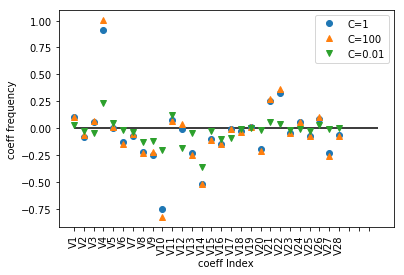

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_dtc = classifier.predict(X_test)

In [ ]:
classifier.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(classifier.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(classifier.score(X_test, y_test)))

In [ ]:
classifier = DecisionTreeClassifier(max_depth = 4, random_state = 42)
classifier.fit(X_train,y_train)
print('accuracy of training set: {:.4f}'.format(classifier.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(classifier.score(X_test, y_test)))

In [ ]:
print('accuracy_score of decesion tree classifier: ', accuracy_score(y_dtc, y_test))
print('confusion_matrix of decision tree classifier: ', confusion_matrix(y_dtc, y_test))
print('precision_score of decision tree classifier: ', precision_score(y_dtc, y_test))
print('recall_score of decision tree classifier: ', recall_score(y_dtc, y_test))
print('precision_recall_curve of decision tree classifier: ', precision_recall_curve(y_dtc, y_test))

**Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)

In [ ]:
y_nb = NBC.predict(X_test)

In [ ]:
NBC.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(NBC.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(NBC.score(X_test, y_test)))

In [ ]:
print('accuracy_score of Naive Bayes: ', accuracy_score(y_test, y_nb))
print('confusion_matrix of Naive Bayes: ', confusion_matrix(y_test, y_nb))
print('precision_score of Naive Bayes: ', precision_score(y_test, y_nb))
print('recall_score of Naive Bayes: ', recall_score(y_test, y_nb))
print('precision_recall_curve of Naive Bayes: ', precision_recall_curve(y_test, y_nb))

**Extreme Gradient Boost Classification**

In [ ]:
from xgboost import XGBClassifier
XGBC= XGBClassifier()
XGBC.fit(X_train, y_train)

In [ ]:
y_xgbc = XGBC.predict(X_test)

In [ ]:
XGBC.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(XGBC.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(XGBC.score(X_test, y_test)))

In [ ]:
print('accuracy_score of xgboost: ', accuracy_score(y_test, y_xgbc))
print('confusion_matrix of xgboost: ', confusion_matrix(y_test, y_xgbc))
print('precision_score of xgboost: ', precision_score(y_test, y_xgbc))
print('recall_score of xgboost: ', recall_score(y_test, y_xgbc))
print('precision_recall_curve of Naive Bayes: ', precision_recall_curve(y_test, y_nb))

Considering the accuracy, precision and recall scores, Extreme Gradient Boost Classification gives satisfactory results.